# Notebook 3: comparison of linear and nonlinear decoders

In [ ]:
!pip install scipy==1.7.3

!git clone https://github.com/Mike-boop/mldecoders.git

import os
os.chdir('mldecoders')

!python setup.py install

In [30]:
# Download the predictions from the CNSP web server 

!wget --no-parent -r 'https://www.data.cnspworkshop.net/data/thornton_data/dnn_predictions' -O cnsp_workshop_tutorial/data/dnn_predictions
dnn_predictions_dir = 'cnsp_workshop_tutorial/data/dnn_predictions'
# dnn_predictions_dir = 'cnsp_workshop_tutorial/data/dnn_default_predictions'

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Intro

In part 1, you trained linear decoders to predict the speech envelope from EEG recordings. In part 2, each of you trained one of the DNNs for one participant's data, and sent us the predicted speech envelope values. In this notebook, we will compare the performances of the linear models with those of the DNNs. 

# Loading the predicted speech envelopes

The outputs of the linear models which we saved can be loaded like so (using the first participant as an example):

In [ ]:
participant = 0
lm_filepath = os.path.join(dnn_predictions_dir, f"lm_P{participant:02d}_predictions.npy")
lm_predictions = np.load(filepath)

In [ ]:
ground_truth = np.load('../data/hugo_subject_specific/ground_truth.npy')
print(pearsonr(lm_predictions, ground_truth))

Similarly, the predictions of the DNNs can be loaded like so:

In [ ]:
fcnn_filepath = os.path.join(dnn_predictions_dir, f"fcnn_P{participant:02d}_predictions.npy")
fcnn_predictions = np.load(filepath)
print(pearsonr(fcnn_predictions, ground_truth))

The time series can be compared visually:

In [ ]:
fs = 125
t = np.arange(len(fcnn_predictions))/fs
plt.plot(t, ground_truth, label='envelope')
plt.plot(t, fcnn_predictions, label='reconstruction')
plt.legend()

plt.xlim(10, 30)
plt.xlabel('Time [s]')

plt.title(f'correlation: {pearsonr(ground_truth, fcnn_predictions)[0]}')

## Exercise: correlate the CNN predictions with the FCNN predictions. What do you notice? Also compare the DNN predictions with the predictions of the linear models.

# Population-level analysis

In [6]:
correlations = []
for participant in range(13):
    predictions = np.load(f'../data/hugo_subject_specific/cnn_predictions_P{participant:02d}.npy')
    correlations.append(pearsonr(ground_truth, predictions)[0])

Text(0.5, 0, 'participant')

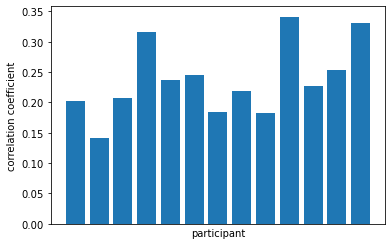

In [9]:
plt.bar(range(13),correlations)
plt.xticks([])
plt.ylabel('correlation coefficient')
plt.xlabel('participant')

# Exercises

# Extension: 2-speaker data